In [2]:

import pandas as pd
from copy import deepcopy

#Importing Dataset
file_path = 'car_parking_dataset.xlsx'  
data = pd.read_excel(file_path)
df = deepcopy(data)  #deepcopy

print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Entry_ID Vehicle_Number Vehicle_Type           Entry_Time  \
0         1     KA76GH9472          SUV  2025-03-26 15:46:00   
1         2     TN16AB5030        Truck  2025-01-17 06:03:00   
2         3     DL82EF5507          SUV  2025-01-19 14:10:00   
3         4     TN21GH9009          Car  2025-02-23 07:43:00   
4         5     TN78CD9741          Car  2025-02-07 07:11:00   

             Exit_Time  Duration_Minutes Parking_Slot Parking_Level  \
0  2025-03-26 23:45:00               479     SLOT-150            L1   
1  2025-01-17 07:14:00                71     SLOT-495            B2   
2  2025-01-19 20:48:00               398     SLOT-393             G   
3  2025-02-23 09:47:00               124      SLOT-27            B1   
4  2025-02-07 13:11:00               360       SLOT-3            B2   

  Payment_Status  Amount_Charged  
0           Paid           335.3  
1           Paid            71.0  
2           Paid           278.6  
3           Paid            62.

In [3]:
# Check for basic information
print(" Dataset Info:")
print(df.info())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates and drop them
df.drop_duplicates(inplace=True)


if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])


if 'parking_lot_id' in df.columns:
    df['parking_lot_id'] = df['parking_lot_id'].astype(str)

# Final structure after cleaning
print(" Cleaned Dataset Info:")
print(df.info())
print(df.head())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entry_ID          10000 non-null  int64  
 1   Vehicle_Number    10000 non-null  object 
 2   Vehicle_Type      10000 non-null  object 
 3   Entry_Time        10000 non-null  object 
 4   Exit_Time         10000 non-null  object 
 5   Duration_Minutes  10000 non-null  int64  
 6   Parking_Slot      10000 non-null  object 
 7   Parking_Level     10000 non-null  object 
 8   Payment_Status    10000 non-null  object 
 9   Amount_Charged    10000 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB
None
Missing Values:
Entry_ID            0
Vehicle_Number      0
Vehicle_Type        0
Entry_Time          0
Exit_Time           0
Duration_Minutes    0
Parking_Slot        0
Parking_Level       0
Payment_Status      0
Amount_Charged      0
dtype: i

columns-

In [4]:
print(df.columns.tolist())

['Entry_ID', 'Vehicle_Number', 'Vehicle_Type', 'Entry_Time', 'Exit_Time', 'Duration_Minutes', 'Parking_Slot', 'Parking_Level', 'Payment_Status', 'Amount_Charged']


In [5]:
# Convert Entry_Time and Exit_Time to datetime
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])
df['Exit_Time'] = pd.to_datetime(df['Exit_Time'])

# Extract features from Entry_Time
df['entry_hour'] = df['Entry_Time'].dt.hour
df['entry_day_of_week'] = df['Entry_Time'].dt.dayofweek
df['is_weekend_entry'] = df['entry_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Optional: Do the same for Exit_Time
df['exit_hour'] = df['Exit_Time'].dt.hour
df['exit_day_of_week'] = df['Exit_Time'].dt.dayofweek
df['is_weekend_exit'] = df['exit_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Preview updated dataframe
df[['Entry_Time', 'entry_hour', 'entry_day_of_week', 'is_weekend_entry']].head()


,Entry_Time,entry_hour,entry_day_of_week,is_weekend_entry
0,2025-03-26 15:46:00,15,2,0
1,2025-01-17 06:03:00,6,4,0
2,2025-01-19 14:10:00,14,6,1
3,2025-02-23 07:43:00,7,6,1
4,2025-02-07 07:11:00,7,4,0


In [8]:
# df.drop(['Vehicle_Number'], axis=1, inplace=True)

 1. Basic Info & Summary


In [10]:
# Basic summary of dataset
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entry_ID          10000 non-null  int64  
 1   Vehicle_Number    10000 non-null  object 
 2   Vehicle_Type      10000 non-null  object 
 3   Entry_Time        10000 non-null  object 
 4   Exit_Time         10000 non-null  object 
 5   Duration_Minutes  10000 non-null  int64  
 6   Parking_Slot      10000 non-null  object 
 7   Parking_Level     10000 non-null  object 
 8   Payment_Status    10000 non-null  object 
 9   Amount_Charged    10000 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB
None

Summary Statistics:
          Entry_ID  Duration_Minutes  Amount_Charged
count  10000.00000       10000.00000    10000.000000
mean    5000.50000         244.85400      146.640130
std     2886.89568         136.06675      115.857562
min        1.00000        

 2. Count of Vehicles by Vehicle Type

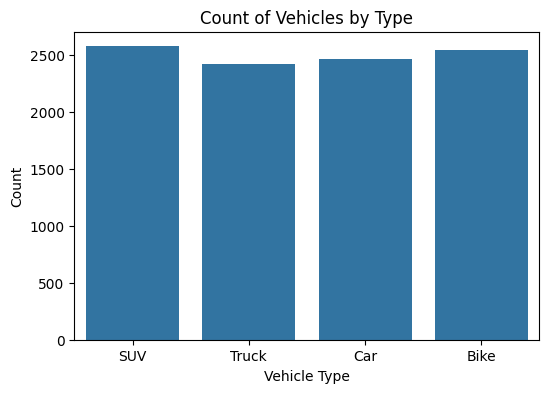

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle_Type')
plt.title("Count of Vehicles by Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


3. Entry Hour Distribution

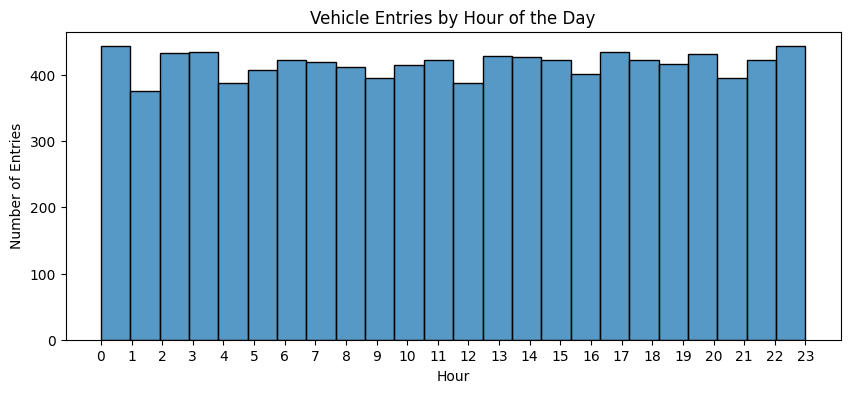

In [16]:
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])
df['entry_hour'] = df['Entry_Time'].dt.hour

plt.figure(figsize=(10, 4))
sns.histplot(df['entry_hour'], bins=24, kde=False)
plt.title("Vehicle Entries by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Entries")
plt.xticks(range(0, 24))
plt.show()


 4. Entries on Weekdays vs Weekends

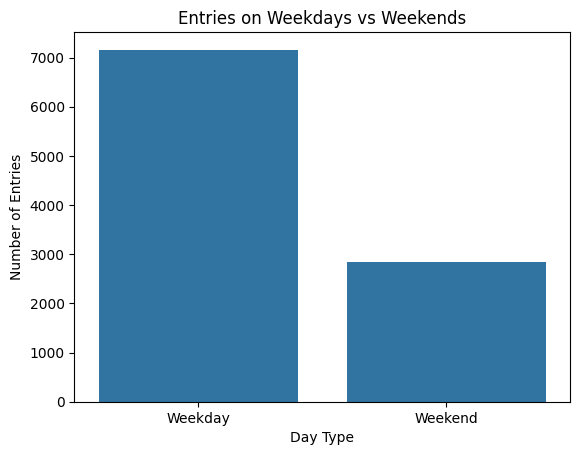

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("car_parking_dataset.xlsx")
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])


df['is_weekend_entry'] = (df['Entry_Time'].dt.weekday >= 5).astype(int)

# Plot
sns.countplot(data=df, x='is_weekend_entry')
plt.title("Entries on Weekdays vs Weekends")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel("Day Type")
plt.ylabel("Number of Entries")
plt.show()


 5. Parking Duration Distribution

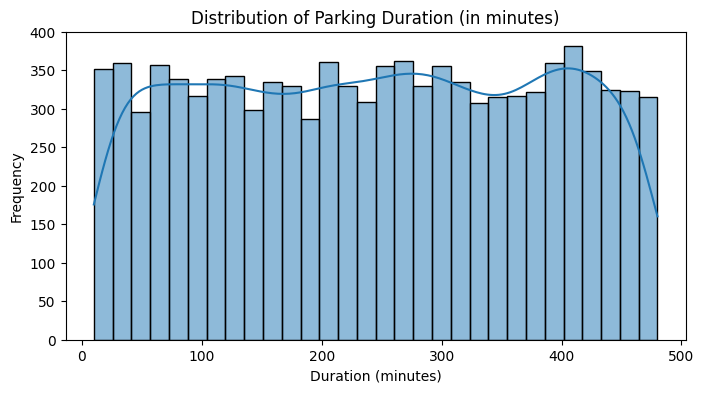

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Duration_Minutes'], bins=30, kde=True)
plt.title("Distribution of Parking Duration (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()




 Revenue by Parking Level

C:\Users\aktiw\AppData\Local\Temp\ipykernel_17360\4278124502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Parking_Level', y='Amount_Charged', palette='coolwarm')


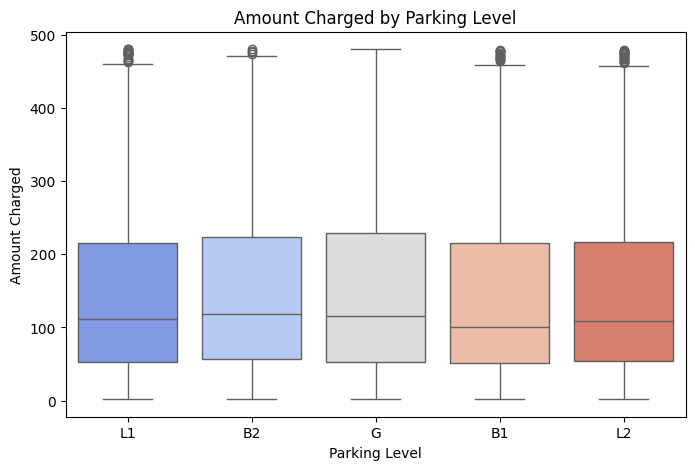

In [7]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Parking_Level', y='Amount_Charged', palette='coolwarm')
plt.title("Amount Charged by Parking Level")
plt.xlabel("Parking Level")
plt.ylabel("Amount Charged")
plt.show()


1. Univariate Analysis

C:\Users\aktiw\AppData\Local\Temp\ipykernel_17360\151510398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Vehicle_Type', palette='viridis')


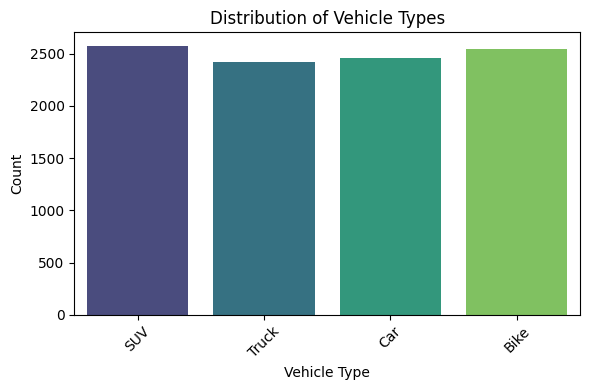

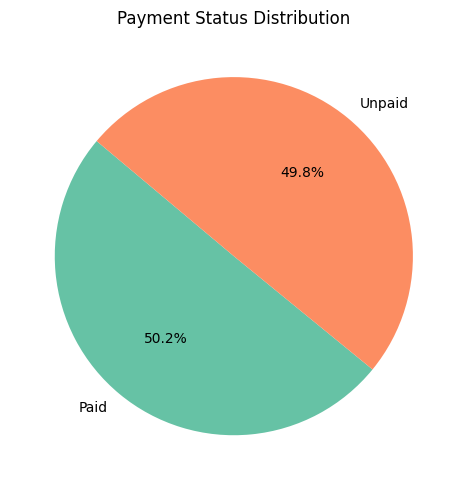

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vehicle Type Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle_Type', palette='viridis')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Status Pie Chart
payment_counts = df['Payment_Status'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Payment Status Distribution')
plt.tight_layout()
plt.show()


2. Bivariate Analysis

C:\Users\aktiw\AppData\Local\Temp\ipykernel_17360\198030075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Parking_Level', y='Duration_Minutes', estimator='mean', palette='coolwarm')


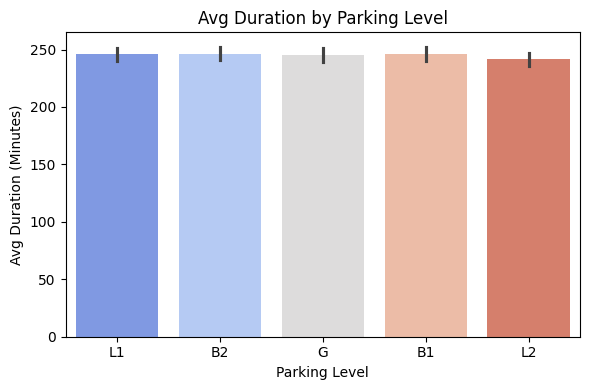

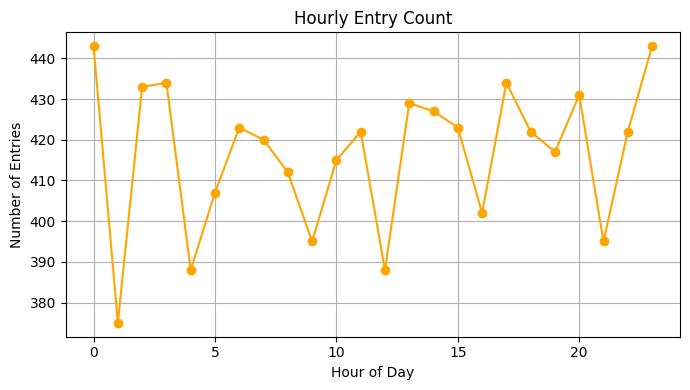

In [9]:
# Average Duration by Parking Level
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Parking_Level', y='Duration_Minutes', estimator='mean', palette='coolwarm')
plt.title('Avg Duration by Parking Level')
plt.xlabel('Parking Level')
plt.ylabel('Avg Duration (Minutes)')
plt.tight_layout()
plt.show()

# Hourly Entry Count Line Plot
df['Entry_Hour'] = pd.to_datetime(df['Entry_Time']).dt.hour
hourly_counts = df['Entry_Hour'].value_counts().sort_index()

plt.figure(figsize=(7,4))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='orange')
plt.title('Hourly Entry Count')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()


Multivariate Analysis & Correlation

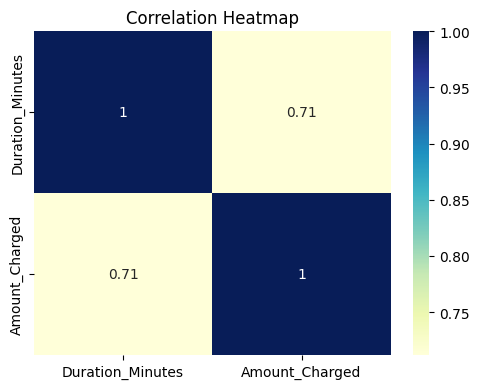

In [10]:
# Correlation Heatmap
numeric_cols = ['Duration_Minutes', 'Amount_Charged']
plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Time-Based Trend Analysis

C:\Users\aktiw\AppData\Local\Temp\ipykernel_17360\2625725899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='Duration_Minutes', palette='Set3')


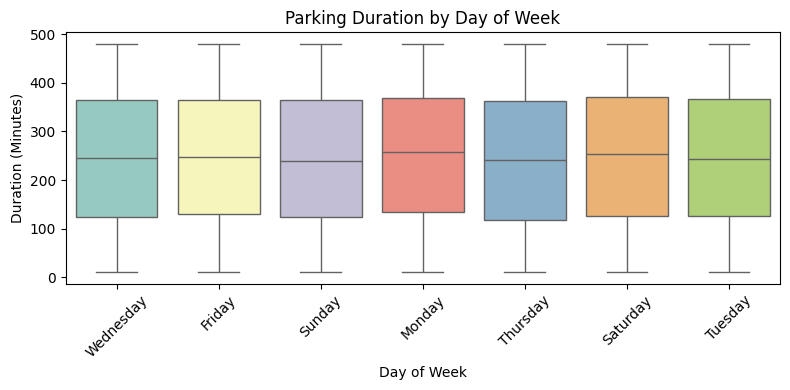

In [11]:
# Extracting time-based features
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])
df['day_of_week'] = df['Entry_Time'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Boxplot for Duration by Day of Week
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='day_of_week', y='Duration_Minutes', palette='Set3')
plt.title('Parking Duration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Prepare the Dataset

In [12]:
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])
df['entry_hour'] = df['Entry_Time'].dt.hour
df['entry_day_of_week'] = df['Entry_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend_entry'] = df['entry_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


 2. Train Model

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df['is_available'] = df['Payment_Status'].apply(lambda x: 1 if x == 'Unpaid' else 0)

# Encode categorical features
le_vehicle = LabelEncoder()
le_level = LabelEncoder()

df['Vehicle_Type_enc'] = le_vehicle.fit_transform(df['Vehicle_Type'])
df['Parking_Level_enc'] = le_level.fit_transform(df['Parking_Level'])

# Feature set
features = ['entry_hour', 'entry_day_of_week', 'is_weekend_entry', 'Vehicle_Type_enc', 'Parking_Level_enc']
X = df[features]
y = df['is_available']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5085
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1025
           1       0.50      0.51      0.50       975

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



3. Predict from User Input

In [15]:
# Function to predict availability from user input
def predict_availability(hour, day_of_week, is_weekend, vehicle_type, parking_level):
    vehicle_encoded = le_vehicle.transform([vehicle_type])[0]
    level_encoded = le_level.transform([parking_level])[0]
    
    input_data = [[hour, day_of_week, is_weekend, vehicle_encoded, level_encoded]]
    prediction = model.predict(input_data)[0]
    
    return " Slot likely AVAILABLE" if prediction == 1 else " Slot likely NOT available"

# Example Usage
# Input: 10 AM, Monday, Not weekend, 'Car', 'L1'
print(predict_availability(10, 0, 0, 'Car', 'L1'))


 Slot likely NOT available


c:\Users\aktiw\OneDrive\Documents\ParkingPredictionWebApp\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1. Import Metrics and Evaluate

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print(" Accuracy Score:", round(accuracy_score(y_test, y_pred), 2))

# Precision
print(" Precision Score:", round(precision_score(y_test, y_pred), 2))

# Recall
print(" Recall Score:", round(recall_score(y_test, y_pred), 2))

# F1 Score
print(" F1 Score:", round(f1_score(y_test, y_pred), 2))

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


 Accuracy Score: 0.51
 Precision Score: 0.5
 Recall Score: 0.51
 F1 Score: 0.5

 Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1025
           1       0.50      0.51      0.50       975

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



 2. Confusion Matrix Visualization

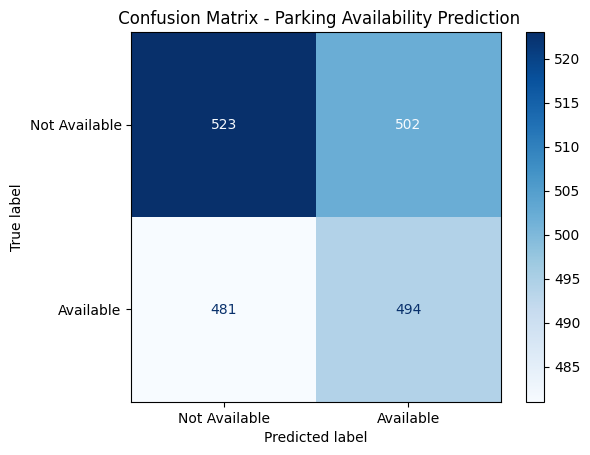

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Available", "Available"])
disp.plot(cmap="Blues", values_format='d')
plt.title(" Confusion Matrix - Parking Availability Prediction")
plt.show()
